# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [5]:
#  1. Get the total rides for each city type
ride_by_city_type = pyber_data_df.groupby(['type']).count()['ride_id']
ride_by_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
# 2. Get the total drivers for each city type
driver_by_city_type = city_data_df.groupby(['type']).count()['driver_count']
driver_by_city_type

type
Rural       18
Suburban    36
Urban       66
Name: driver_count, dtype: int64

In [7]:
#  3. Get the total amount of fares for each city type
paid_fares_city_type = pyber_data_df.set_index(['type']).groupby(['type']).sum()['fare']
paid_fares_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
#  4. Get the average fare per ride for each city type. 
avg_fares_city_type = pyber_data_df.set_index(['type']).groupby(['type']).sum()['fare'] / pyber_data_df.set_index(['type']).groupby(['type']).count()['fare']
avg_fares_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [9]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver_city_type = pyber_data_df.set_index(['type']).groupby(['type']).sum()['fare'] / city_data_df.set_index(['type']).groupby(['type']).sum()['driver_count']
avg_fare_driver_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [15]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
    {"Total Rides": ride_by_city_type.map("{:,}".format),
    "Total Drivers": driver_by_city_type.map("{:,}".format),
    "Total Fares": paid_fares_city_type.map("${:,.2f}".format),
    "Average Fare per Ride": avg_fares_city_type.map("${:,.2f}".format),
    "Average Fare per Driver": avg_fare_driver_city_type.map("${:,.2f}".format)}
)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,18,"$4,327.93",$34.62,$55.49
Suburban,625,36,"$19,356.33",$30.97,$39.50
Urban,"1,625",66,"$39,854.38",$24.53,$16.57


In [16]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [17]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [19]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
date_count_by_city = pyber_data_df.groupby(["date", "type"]).sum()['fare']
date_count_by_city


date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [21]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
date_count_by_city = date_count_by_city.reset_index()
date_count_by_city

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [26]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_table = pd.pivot_table(date_count_by_city, values = 'fare', index = 'date', columns = 'type')
pyber_table

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [29]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
#this is like when your ex brings up conversations from years ago in a petty fight, THE EXACT TIME FRAME , and no, i did not eat your totinos pizza rolls
pyber_tablepiv = pyber_table.loc['2019-01-01': '2019-04-29']
pyber_tablepiv


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [30]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index) --> awkwardly gives answer prior to doing it..NOICE
pyber_tablepiv.index = pd.to_datetime(pyber_tablepiv.index)


In [31]:
# 7. Check that the datatype for the index is datetime using df.info()
#generic info breakdown for the datatype here
pyber_tablepiv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [36]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
#resample this joint, break it down by the weeks since that is better than requiring daily stats
pyber_tablepiv_resample = pyber_tablepiv.resample('W').sum()
pyber_tablepiv_resample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2019-01-06 to 2019-04-28
Freq: W-SUN
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     17 non-null     float64
 1   Suburban  17 non-null     float64
 2   Urban     17 non-null     float64
dtypes: float64(3)
memory usage: 544.0 bytes


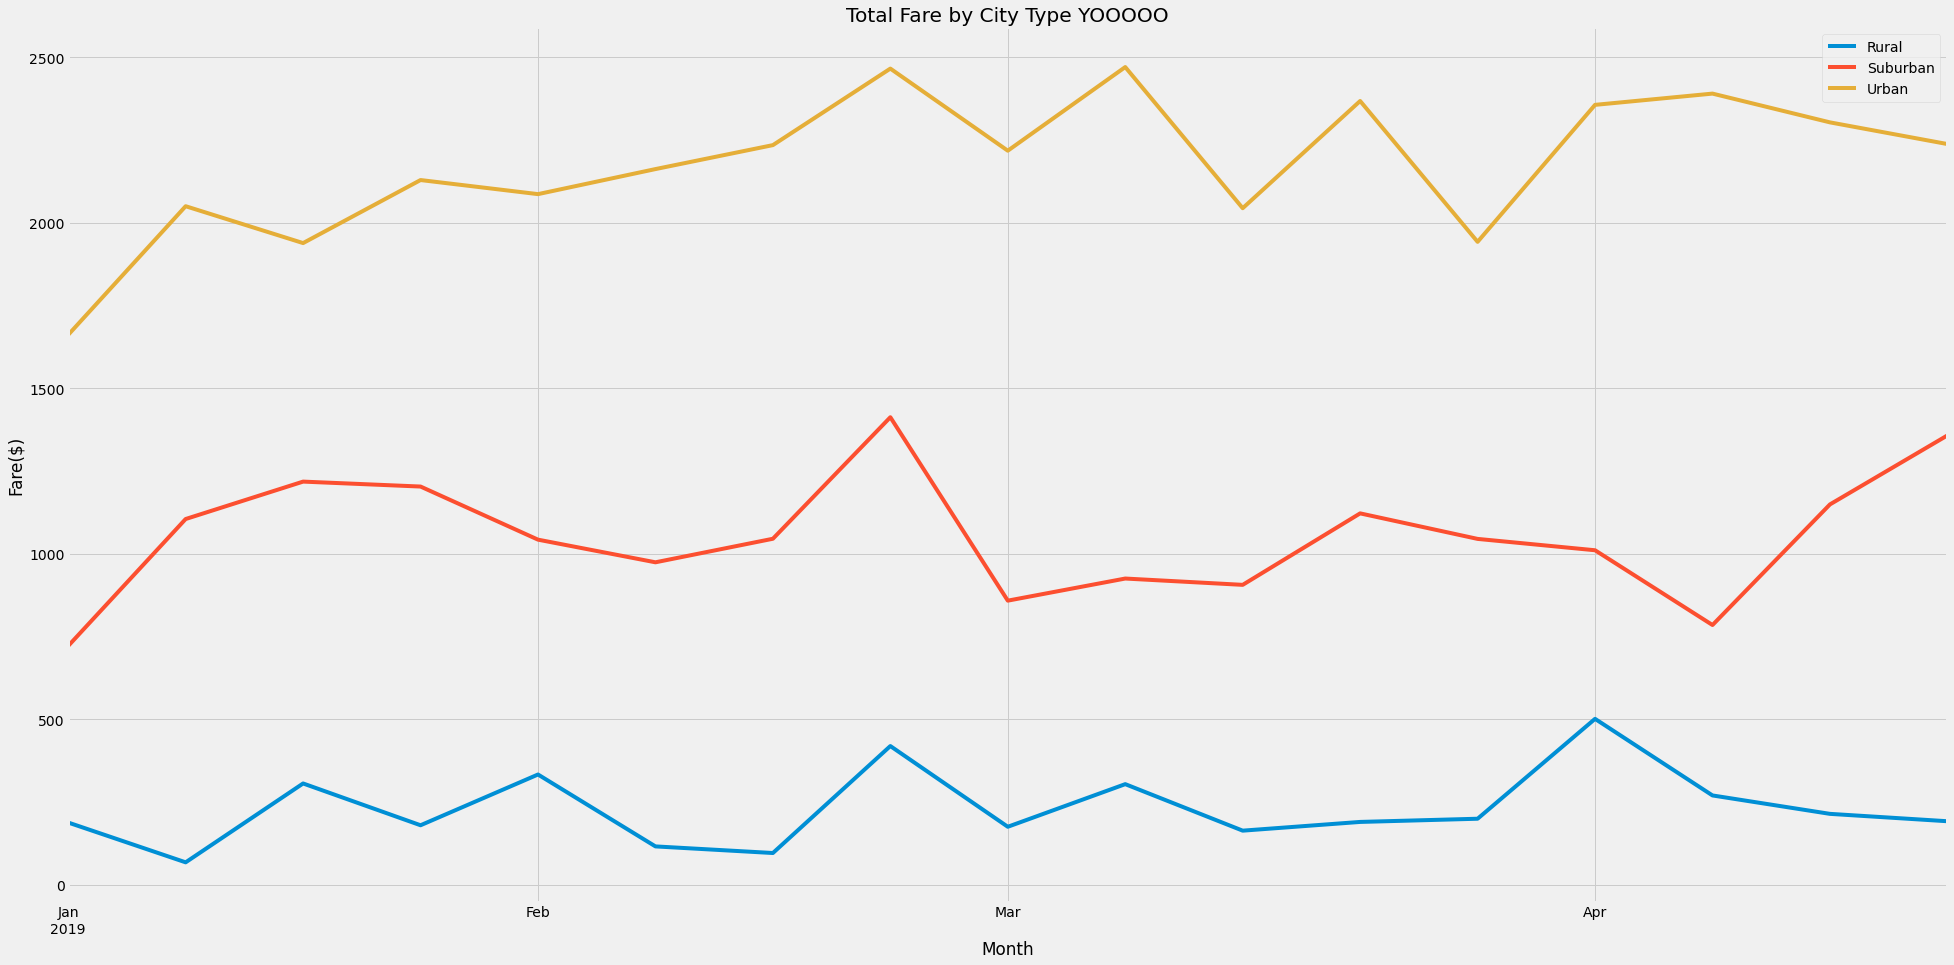

In [37]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

#makes the legends and labels for the graph yo 
pyber_tablepiv_resample.plot(figsize=(30,15))
plt.xlabel("Month")
plt.ylabel("Fare($)")
plt.title("Total Fare by City Type YOOOOO")

#save this jaunt to the resources folder for later flexing
plt.savefig("Resources/Total Fare by City Type graph.png")
plt.legend()

